In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
import shap
import xgboost as xgb
import xgboost
from sklearn import metrics
from numpy import interp
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, make_scorer, precision_score, brier_score_loss,roc_curve, roc_auc_score, auc, classification_report, precision_recall_curve, f1_score
from imblearn import under_sampling, over_sampling, combine
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter
from catboost import CatBoostClassifier,Pool 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_validate, KFold
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [2]:
Data = pd.read_csv('C:/Users/71908/Desktop/Predictors for extubation/data/data-final.csv')
Data

,group_7d,group_48h,age,bmi,surgery_type,hb_mean,platelet_mean,wbc_mean,po2_mean,pco2_mean,...,fio2_mean,hr_mean,mbp_mean,spo2_mean,congestive_heart_failure,cerebrovascular_disease,chronic_pulmonary_disease,renal_disease,liver_disease,diabetes
0,0,0,71.489037,31.799974,2,9.275,166.250000,15.000000,146.77777,50.555557,...,47.500000,76.393936,67.891891,97.038460,1,0,1,0,0,1
1,0,0,56.219223,32.744930,1,9.050,92.000000,18.049999,147.20000,37.400002,...,40.000000,86.080002,92.599998,97.839996,1,0,0,1,0,0
2,1,1,86.771370,27.262625,1,9.800,67.666664,12.750000,76.00000,37.285713,...,70.833336,90.595238,64.511627,93.761902,1,0,1,1,1,1
3,1,0,85.973587,23.985310,3,10.200,186.000000,21.600000,118.60000,33.200001,...,40.909092,78.500000,73.941177,98.606064,1,0,0,1,0,0
4,0,0,76.054535,28.405506,1,10.700,187.000000,13.100000,117.00000,39.599998,...,42.857143,70.919998,75.599998,96.480003,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0,0,78.832451,29.414825,1,9.250,164.000000,9.750000,114.60000,33.599998,...,43.750000,80.807693,77.057693,99.230766,0,0,0,1,0,0
772,0,0,66.436714,22.733261,1,9.025,167.666670,9.633333,225.75000,38.000000,...,50.000000,69.218750,62.806450,97.645164,1,1,1,0,0,0
773,0,0,69.815598,33.587898,2,9.600,162.000000,24.799999,94.50000,39.500000,...,63.000000,97.599998,70.440002,93.961540,1,1,0,0,0,1
774,0,0,55.665543,31.208057,2,9.875,89.750000,18.875000,91.50000,38.750000,...,38.333332,80.519997,73.048782,96.879997,1,0,1,0,0,0


In [3]:
Features = Data.drop(columns=['group_7d','group_48h'])

In [4]:
from sklearn import preprocessing

In [5]:
# Standardize Data

standard_data = Features.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,:] = scaler.fit_transform(Features.iloc[:,:])
standard_data

,age,bmi,surgery_type,hb_mean,platelet_mean,wbc_mean,po2_mean,pco2_mean,pao2fio2ratio_mean,ph_mean,...,fio2_mean,hr_mean,mbp_mean,spo2_mean,congestive_heart_failure,cerebrovascular_disease,chronic_pulmonary_disease,renal_disease,liver_disease,diabetes
0,0.141771,0.420092,0.236623,-0.406172,0.388877,0.207961,0.775789,2.452327,-0.067217,-2.478422,...,-0.141853,-0.680949,-0.632913,-0.297334,0.855653,-0.483430,1.526588,-0.701646,-0.327093,1.263059
1,-1.041653,0.577192,-1.047429,-0.592400,-0.606572,0.705990,0.788469,-0.152296,1.568249,1.486861,...,-0.898619,0.090993,3.079537,0.164730,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
2,1.326165,-0.334248,-1.047429,0.028363,-0.932803,-0.159437,-1.349745,-0.174924,-1.806676,-1.476447,...,2.212530,0.450840,-1.140805,-2.186182,0.855653,-0.483430,1.526588,1.425219,3.057232,1.263059
3,1.264336,-0.879105,1.520675,0.359437,0.653660,1.285663,-0.070420,-0.983840,0.483419,0.293961,...,-0.806890,-0.513104,0.276006,0.606348,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
4,0.495601,-0.144243,-1.047429,0.773280,0.667067,-0.102286,-0.118470,0.283273,0.044274,0.161418,...,-0.610327,-1.117201,0.525248,-0.619269,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.710892,0.023558,-1.047429,-0.426864,0.358712,-0.649301,-0.190545,-0.904646,0.157369,-0.070533,...,-0.520236,-0.329190,0.744270,0.966472,-1.168697,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
772,-0.249788,-1.087260,-1.047429,-0.613093,0.407870,-0.668352,3.147412,-0.033505,2.861121,-0.393606,...,0.110402,-1.252784,-1.397012,0.052415,0.855653,2.068553,1.526588,-0.701646,-0.327093,-0.791729
773,0.012078,0.717336,0.236623,-0.137173,0.331899,1.808185,-0.794170,0.263475,-0.671163,-2.795973,...,1.422130,1.009093,-0.250053,-2.071096,0.855653,2.068553,-0.655055,-0.701646,-0.327093,1.263059
774,-1.084563,0.321685,0.236623,0.090440,-0.636737,0.840703,-0.884263,0.114985,-0.276563,1.635978,...,-1.066789,-0.352118,0.141922,-0.388683,0.855653,-0.483430,1.526588,-0.701646,-0.327093,-0.791729


In [6]:
X = pd.DataFrame(standard_data)
y = Data['group_7d']

In [7]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, 
     random_state=5, train_size=0.8)

In [8]:
# estimate scale_pos_weight value
counter_train = Counter(y_train)
estimate_train = counter_train[0] / counter_train[1]
estimate_train

2.757575757575758

In [9]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print (classification_report(y_true, y_pred,digits=3)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [10]:
# CV model
scoring = {'report':    make_scorer(classification_report_with_accuracy_score),
           'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'sensitivity'  : make_scorer(recall_score),
           'specificity': make_scorer(recall_score,pos_label=0),
           'F-1': make_scorer(f1_score),
           'auc': make_scorer(roc_auc_score, needs_proba=True),
           'brier_score':make_scorer(brier_score_loss, needs_proba=True)
          }

In [11]:
#kfold = StratifiedKFold(n_splits=5, random_state=None)
kfold = KFold(n_splits=5, random_state=0, shuffle=True)

In [12]:
####LOGISTIC REGRESSION

In [13]:
LR_model = LogisticRegression(solver='liblinear', max_iter=10000, class_weight="balanced")

In [14]:
results = cross_validate(LR_model, X_train, y_train, cv=kfold,scoring=scoring)

              precision    recall  f1-score   support

           0      0.868     0.733     0.795        90
           1      0.500     0.706     0.585        34

    accuracy                          0.726       124
   macro avg      0.684     0.720     0.690       124
weighted avg      0.767     0.726     0.738       124

              precision    recall  f1-score   support

           0      0.860     0.796     0.827        93
           1      0.500     0.613     0.551        31

    accuracy                          0.750       124
   macro avg      0.680     0.704     0.689       124
weighted avg      0.770     0.750     0.758       124

              precision    recall  f1-score   support

           0      0.861     0.747     0.800        91
           1      0.489     0.667     0.564        33

    accuracy                          0.726       124
   macro avg      0.675     0.707     0.682       124
weighted avg      0.762     0.726     0.737       124

              preci

In [15]:
LR_model.fit(X_train, y_train)
LR_y_pred_test = LR_model.predict(X_test)
LR_y_preds_proba_test = LR_model.predict_proba(X_test)

In [16]:
# # #計算auc
LR_auc_test = roc_auc_score(y_test, LR_y_preds_proba_test[:, 1])
LR_fpr_test, LR_tpr_test, LR_thresholds_test = roc_curve(y_test, LR_y_preds_proba_test[:, 1])

In [17]:
# performance
print('Model: Logistic Regression\n')
print(classification_report(y_test, LR_y_pred_test,
      target_names=['class 0', 'Class 1'],digits=3))
print(f'Accuracy Score: {accuracy_score(y_test,LR_y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, LR_y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, LR_y_preds_proba_test[:, 1])}')
print(f'Recall score: {recall_score(y_test,LR_y_pred_test)}')
print(f'Brier score: {brier_score_loss(y_test, LR_y_preds_proba_test[:, 1])}')
print("###########################################################\n")

Model: Logistic Regression

              precision    recall  f1-score   support

     class 0      0.872     0.819     0.844       116
     Class 1      0.553     0.650     0.598        40

    accuracy                          0.776       156
   macro avg      0.712     0.734     0.721       156
weighted avg      0.790     0.776     0.781       156

Accuracy Score: 0.7756410256410257
Confusion Matrix: 
[[95 21]
 [14 26]]
Area Under Curve: 0.7657327586206896
Recall score: 0.65
Brier score: 0.17283945064475809
###########################################################



In [18]:
 #Data for ROC plot 
LR_fpr_test, LR_tpr_test, LR_thresholds_test = roc_curve(y_test, LR_y_preds_proba_test[:, 1])

In [19]:
#####RANDOM FOREST

In [20]:
BRF_model =BalancedRandomForestClassifier(n_estimators=3000, criterion='entropy', verbose=1)
results = cross_validate(BRF_model, X_train, y_train, cv=kfold,scoring=scoring)
print("Accuracy: %.2f%% (%.2f%%)" % (results['test_accuracy'].mean()*100, results['test_accuracy'].std()*100))
print("Precision: %.2f%% (%.2f%%)" % (results['test_precision'].mean()*100, results['test_precision'].std()*100))
print("Sensitivity: %.2f%% (%.2f%%)" % (results['test_sensitivity'].mean()*100, results['test_sensitivity'].std()*100))
print("Specificity: %.2f%% (%.2f%%)" % (results['test_specificity'].mean()*100, results['test_specificity'].std()*100))
print("AUC: %.2f%% (%.2f%%)" % (results['test_auc'].mean()*100, results['test_auc'].std()*100))
BRF_model.fit(X_train, y_train)
BRF_y_pred_test = BRF_model.predict(X_test)
BRF_y_preds_proba_test = BRF_model.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0      0.938     0.667     0.779        90
           1      0.500     0.882     0.638        34

    accuracy                          0.726       124
   macro avg      0.719     0.775     0.709       124
weighted avg      0.818     0.726     0.741       124



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0      0.869     0.785     0.825        93
           1      0.500     0.645     0.563        31

    accuracy                          0.750       124
   macro avg      0.685     0.715     0.694       124
weighted avg      0.777     0.750     0.759       124



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0      0.867     0.714     0.783        91
           1      0.469     0.697     0.561        33

    accuracy                          0.710       124
   macro avg      0.668     0.706     0.672       124
weighted avg      0.761     0.710     0.724       124



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0      0.831     0.796     0.813        93
           1      0.457     0.516     0.485        31

    accuracy                          0.726       124
   macro avg      0.644     0.656     0.649       124
weighted avg      0.738     0.726     0.731       124



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0      0.835     0.750     0.790        88
           1      0.511     0.639     0.568        36

    accuracy                          0.718       124
   macro avg      0.673     0.694     0.679       124
weighted avg      0.741     0.718     0.726       124



[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.4s finished


Accuracy: 72.58% (1.35%)
Precision: 48.75% (2.06%)
Sensitivity: 67.59% (11.91%)
Specificity: 74.23% (4.74%)
AUC: 77.75% (4.22%)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.3s finished


In [21]:
# #計算auc
BRF_auc_test = roc_auc_score(y_test, BRF_y_preds_proba_test[:, 1])
BRF_fpr_test, BRF_tpr_test, BRF_thresholds_test = roc_curve(y_test, BRF_y_preds_proba_test[:, 1])

In [22]:
# performance
print('Model: Balanced Random Forest\n')
print(classification_report(y_test, BRF_y_pred_test, target_names=['Not Ready (Class 0)', 'Ready (Class 1)'],digits=3))
print(f'Accuracy Score: {accuracy_score(y_test,BRF_y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, BRF_y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, BRF_y_preds_proba_test[:,1])}')
print(f'Recall score: {recall_score(y_test,BRF_y_pred_test)}')
print(f'Brier score: {brier_score_loss(y_test, BRF_y_preds_proba_test[:,1])}')
print("###########################################################\n")

Model: Balanced Random Forest

                     precision    recall  f1-score   support

Not Ready (Class 0)      0.875     0.784     0.827       116
    Ready (Class 1)      0.519     0.675     0.587        40

           accuracy                          0.756       156
          macro avg      0.697     0.730     0.707       156
       weighted avg      0.784     0.756     0.766       156

Accuracy Score: 0.7564102564102564
Confusion Matrix: 
[[91 25]
 [13 27]]
Area Under Curve: 0.7885775862068966
Recall score: 0.675
Brier score: 0.18333995940170938
###########################################################



In [23]:
 #Data for ROC plot 
BRF_fpr_test, BRF_tpr_test, BRF_thresholds_test = roc_curve(y_test, BRF_y_preds_proba_test[:, 1])

In [24]:
#####XGBOOST

In [25]:
# fit model no training data 
xgb_model =  xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.5, learning_rate=0.005, 
                              max_depth=12, n_estimators=900, scale_pos_weight=estimate_train)

In [26]:
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_validate(xgb_model, X_train, y_train, cv=kfold,scoring=scoring)
print("Accuracy: %.2f%% (%.2f%%)" % (results['test_accuracy'].mean()*100, results['test_accuracy'].std()*100))
print("Precision: %.2f%% (%.2f%%)" % (results['test_precision'].mean()*100, results['test_precision'].std()*100))
print("Sensitivity: %.2f%% (%.2f%%)" % (results['test_sensitivity'].mean()*100, results['test_sensitivity'].std()*100))
print("Specificity: %.2f%% (%.2f%%)" % (results['test_specificity'].mean()*100, results['test_specificity'].std()*100))
print("F-1: %.2f%% (%.2f%%)" % (results['test_F-1'].mean()*100, results['test_F-1'].std()*100))
print("AUC: %.2f%% (%.2f%%)" % (results['test_auc'].mean()*100, results['test_auc'].std()*100))

              precision    recall  f1-score   support

           0      0.777     0.879     0.825        91
           1      0.476     0.303     0.370        33

    accuracy                          0.726       124
   macro avg      0.626     0.591     0.598       124
weighted avg      0.697     0.726     0.704       124

              precision    recall  f1-score   support

           0      0.771     0.890     0.827        91
           1      0.474     0.273     0.346        33

    accuracy                          0.726       124
   macro avg      0.623     0.581     0.586       124
weighted avg      0.692     0.726     0.699       124

              precision    recall  f1-score   support

           0      0.821     0.857     0.839        91
           1      0.552     0.485     0.516        33

    accuracy                          0.758       124
   macro avg      0.686     0.671     0.677       124
weighted avg      0.749     0.758     0.753       124

              preci

In [27]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.06935	validation_0-logloss:0.68965	validation_1-error:0.35256	validation_1-logloss:0.69176
[1]	validation_0-error:0.02419	validation_0-logloss:0.68633	validation_1-error:0.31410	validation_1-logloss:0.69007
[2]	validation_0-error:0.01290	validation_0-logloss:0.68356	validation_1-error:0.30769	validation_1-logloss:0.68894
[3]	validation_0-error:0.01290	validation_0-logloss:0.68040	validation_1-error:0.28205	validation_1-logloss:0.68735
[4]	validation_0-error:0.00323	validation_0-logloss:0.67721	validation_1-error:0.26923	validation_1-logloss:0.68615
[5]	validation_0-error:0.00484	validation_0-logloss:0.67391	validation_1-error:0.25641	validation_1-logloss:0.68443
[6]	validation_0-error:0.00161	validation_0-logloss:0.67084	validation_1-error:0.25000	validation_1-logloss:0.68292
[7]	validation_0-error:0.00323	validation_0-logloss:0.66779	validation_1-error:0.22436	validation_1-logloss:0.68144
[8]	validation_0-error:0.00323	validation_0-logloss:0.66467	validation_1

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[30]	validation_0-error:0.00000	validation_0-logloss:0.60110	validation_1-error:0.19231	validation_1-logloss:0.64966
[31]	validation_0-error:0.00000	validation_0-logloss:0.59845	validation_1-error:0.18590	validation_1-logloss:0.64823
[32]	validation_0-error:0.00000	validation_0-logloss:0.59571	validation_1-error:0.19231	validation_1-logloss:0.64698
[33]	validation_0-error:0.00000	validation_0-logloss:0.59311	validation_1-error:0.19231	validation_1-logloss:0.64577
[34]	validation_0-error:0.00000	validation_0-logloss:0.59047	validation_1-error:0.19231	validation_1-logloss:0.64495
[35]	validation_0-error:0.00000	validation_0-logloss:0.58788	validation_1-error:0.19872	validation_1-logloss:0.64377
[36]	validation_0-error:0.00000	validation_0-logloss:0.58543	validation_1-error:0.19872	validation_1-logloss:0.64221
[37]	validation_0-error:0.00000	validation_0-logloss:0.58271	validation_1-error:0.19231	validation_1-logloss:0.64103
[38]	validation_0-error:0.00000	validation_0-logloss:0.58021	val

[101]	validation_0-error:0.00000	validation_0-logloss:0.44478	validation_1-error:0.21154	validation_1-logloss:0.57846
[102]	validation_0-error:0.00000	validation_0-logloss:0.44301	validation_1-error:0.21154	validation_1-logloss:0.57794
[103]	validation_0-error:0.00000	validation_0-logloss:0.44124	validation_1-error:0.21154	validation_1-logloss:0.57721
[104]	validation_0-error:0.00000	validation_0-logloss:0.43948	validation_1-error:0.21154	validation_1-logloss:0.57637
[105]	validation_0-error:0.00000	validation_0-logloss:0.43765	validation_1-error:0.20513	validation_1-logloss:0.57587
[106]	validation_0-error:0.00000	validation_0-logloss:0.43592	validation_1-error:0.21154	validation_1-logloss:0.57487
[107]	validation_0-error:0.00000	validation_0-logloss:0.43413	validation_1-error:0.20513	validation_1-logloss:0.57413
[108]	validation_0-error:0.00000	validation_0-logloss:0.43247	validation_1-error:0.20513	validation_1-logloss:0.57318
[109]	validation_0-error:0.00000	validation_0-logloss:0.

[171]	validation_0-error:0.00000	validation_0-logloss:0.33951	validation_1-error:0.20513	validation_1-logloss:0.53350
[172]	validation_0-error:0.00000	validation_0-logloss:0.33826	validation_1-error:0.20513	validation_1-logloss:0.53319
[173]	validation_0-error:0.00000	validation_0-logloss:0.33701	validation_1-error:0.20513	validation_1-logloss:0.53260
[174]	validation_0-error:0.00000	validation_0-logloss:0.33573	validation_1-error:0.20513	validation_1-logloss:0.53198
[175]	validation_0-error:0.00000	validation_0-logloss:0.33453	validation_1-error:0.20513	validation_1-logloss:0.53162
[176]	validation_0-error:0.00000	validation_0-logloss:0.33329	validation_1-error:0.20513	validation_1-logloss:0.53091
[177]	validation_0-error:0.00000	validation_0-logloss:0.33208	validation_1-error:0.20513	validation_1-logloss:0.53042
[178]	validation_0-error:0.00000	validation_0-logloss:0.33083	validation_1-error:0.20513	validation_1-logloss:0.53003
[179]	validation_0-error:0.00000	validation_0-logloss:0.

[241]	validation_0-error:0.00000	validation_0-logloss:0.26640	validation_1-error:0.20513	validation_1-logloss:0.50221
[242]	validation_0-error:0.00000	validation_0-logloss:0.26548	validation_1-error:0.19872	validation_1-logloss:0.50164
[243]	validation_0-error:0.00000	validation_0-logloss:0.26467	validation_1-error:0.19872	validation_1-logloss:0.50106
[244]	validation_0-error:0.00000	validation_0-logloss:0.26373	validation_1-error:0.19872	validation_1-logloss:0.50081
[245]	validation_0-error:0.00000	validation_0-logloss:0.26290	validation_1-error:0.19872	validation_1-logloss:0.50064
[246]	validation_0-error:0.00000	validation_0-logloss:0.26200	validation_1-error:0.20513	validation_1-logloss:0.50021
[247]	validation_0-error:0.00000	validation_0-logloss:0.26106	validation_1-error:0.19872	validation_1-logloss:0.49980
[248]	validation_0-error:0.00000	validation_0-logloss:0.26016	validation_1-error:0.19872	validation_1-logloss:0.49944
[249]	validation_0-error:0.00000	validation_0-logloss:0.

[311]	validation_0-error:0.00000	validation_0-logloss:0.21358	validation_1-error:0.19872	validation_1-logloss:0.48220
[312]	validation_0-error:0.00000	validation_0-logloss:0.21296	validation_1-error:0.19872	validation_1-logloss:0.48190
[313]	validation_0-error:0.00000	validation_0-logloss:0.21235	validation_1-error:0.19872	validation_1-logloss:0.48173
[314]	validation_0-error:0.00000	validation_0-logloss:0.21182	validation_1-error:0.19872	validation_1-logloss:0.48159
[315]	validation_0-error:0.00000	validation_0-logloss:0.21114	validation_1-error:0.19872	validation_1-logloss:0.48152
[316]	validation_0-error:0.00000	validation_0-logloss:0.21058	validation_1-error:0.19872	validation_1-logloss:0.48136
[317]	validation_0-error:0.00000	validation_0-logloss:0.20996	validation_1-error:0.19872	validation_1-logloss:0.48116
[318]	validation_0-error:0.00000	validation_0-logloss:0.20932	validation_1-error:0.19872	validation_1-logloss:0.48086
[319]	validation_0-error:0.00000	validation_0-logloss:0.

[381]	validation_0-error:0.00000	validation_0-logloss:0.17485	validation_1-error:0.20513	validation_1-logloss:0.47054
[382]	validation_0-error:0.00000	validation_0-logloss:0.17437	validation_1-error:0.21154	validation_1-logloss:0.47054
[383]	validation_0-error:0.00000	validation_0-logloss:0.17389	validation_1-error:0.21154	validation_1-logloss:0.47032
[384]	validation_0-error:0.00000	validation_0-logloss:0.17339	validation_1-error:0.21154	validation_1-logloss:0.47020
[385]	validation_0-error:0.00000	validation_0-logloss:0.17292	validation_1-error:0.20513	validation_1-logloss:0.46993
[386]	validation_0-error:0.00000	validation_0-logloss:0.17244	validation_1-error:0.20513	validation_1-logloss:0.46965
[387]	validation_0-error:0.00000	validation_0-logloss:0.17200	validation_1-error:0.21154	validation_1-logloss:0.46959
[388]	validation_0-error:0.00000	validation_0-logloss:0.17153	validation_1-error:0.20513	validation_1-logloss:0.46950
[389]	validation_0-error:0.00000	validation_0-logloss:0.

[451]	validation_0-error:0.00000	validation_0-logloss:0.14556	validation_1-error:0.20513	validation_1-logloss:0.46343
[452]	validation_0-error:0.00000	validation_0-logloss:0.14519	validation_1-error:0.20513	validation_1-logloss:0.46339
[453]	validation_0-error:0.00000	validation_0-logloss:0.14485	validation_1-error:0.20513	validation_1-logloss:0.46328
[454]	validation_0-error:0.00000	validation_0-logloss:0.14451	validation_1-error:0.20513	validation_1-logloss:0.46312
[455]	validation_0-error:0.00000	validation_0-logloss:0.14414	validation_1-error:0.20513	validation_1-logloss:0.46321
[456]	validation_0-error:0.00000	validation_0-logloss:0.14377	validation_1-error:0.20513	validation_1-logloss:0.46322
[457]	validation_0-error:0.00000	validation_0-logloss:0.14343	validation_1-error:0.20513	validation_1-logloss:0.46328
[458]	validation_0-error:0.00000	validation_0-logloss:0.14307	validation_1-error:0.20513	validation_1-logloss:0.46321
[459]	validation_0-error:0.00000	validation_0-logloss:0.

[521]	validation_0-error:0.00000	validation_0-logloss:0.12318	validation_1-error:0.20513	validation_1-logloss:0.45968
[522]	validation_0-error:0.00000	validation_0-logloss:0.12290	validation_1-error:0.20513	validation_1-logloss:0.45951
[523]	validation_0-error:0.00000	validation_0-logloss:0.12265	validation_1-error:0.20513	validation_1-logloss:0.45961
[524]	validation_0-error:0.00000	validation_0-logloss:0.12238	validation_1-error:0.20513	validation_1-logloss:0.45956
[525]	validation_0-error:0.00000	validation_0-logloss:0.12209	validation_1-error:0.20513	validation_1-logloss:0.45961
[526]	validation_0-error:0.00000	validation_0-logloss:0.12182	validation_1-error:0.20513	validation_1-logloss:0.45965
[527]	validation_0-error:0.00000	validation_0-logloss:0.12156	validation_1-error:0.20513	validation_1-logloss:0.45960
[528]	validation_0-error:0.00000	validation_0-logloss:0.12132	validation_1-error:0.20513	validation_1-logloss:0.45963
[529]	validation_0-error:0.00000	validation_0-logloss:0.

[591]	validation_0-error:0.00000	validation_0-logloss:0.10592	validation_1-error:0.21154	validation_1-logloss:0.45752
[592]	validation_0-error:0.00000	validation_0-logloss:0.10571	validation_1-error:0.21154	validation_1-logloss:0.45754
[593]	validation_0-error:0.00000	validation_0-logloss:0.10550	validation_1-error:0.21154	validation_1-logloss:0.45751
[594]	validation_0-error:0.00000	validation_0-logloss:0.10527	validation_1-error:0.21154	validation_1-logloss:0.45751
[595]	validation_0-error:0.00000	validation_0-logloss:0.10504	validation_1-error:0.21154	validation_1-logloss:0.45747
[596]	validation_0-error:0.00000	validation_0-logloss:0.10482	validation_1-error:0.21154	validation_1-logloss:0.45753
[597]	validation_0-error:0.00000	validation_0-logloss:0.10460	validation_1-error:0.21154	validation_1-logloss:0.45757
[598]	validation_0-error:0.00000	validation_0-logloss:0.10439	validation_1-error:0.21154	validation_1-logloss:0.45761
[599]	validation_0-error:0.00000	validation_0-logloss:0.

[661]	validation_0-error:0.00000	validation_0-logloss:0.09206	validation_1-error:0.21154	validation_1-logloss:0.45712
[662]	validation_0-error:0.00000	validation_0-logloss:0.09189	validation_1-error:0.21154	validation_1-logloss:0.45717
[663]	validation_0-error:0.00000	validation_0-logloss:0.09172	validation_1-error:0.21154	validation_1-logloss:0.45695
[664]	validation_0-error:0.00000	validation_0-logloss:0.09155	validation_1-error:0.21154	validation_1-logloss:0.45688
[665]	validation_0-error:0.00000	validation_0-logloss:0.09138	validation_1-error:0.21154	validation_1-logloss:0.45682
[666]	validation_0-error:0.00000	validation_0-logloss:0.09123	validation_1-error:0.21154	validation_1-logloss:0.45673
[667]	validation_0-error:0.00000	validation_0-logloss:0.09105	validation_1-error:0.21154	validation_1-logloss:0.45673
[668]	validation_0-error:0.00000	validation_0-logloss:0.09090	validation_1-error:0.21154	validation_1-logloss:0.45679
[669]	validation_0-error:0.00000	validation_0-logloss:0.

[731]	validation_0-error:0.00000	validation_0-logloss:0.08105	validation_1-error:0.21154	validation_1-logloss:0.45729
[732]	validation_0-error:0.00000	validation_0-logloss:0.08090	validation_1-error:0.21154	validation_1-logloss:0.45726
[733]	validation_0-error:0.00000	validation_0-logloss:0.08075	validation_1-error:0.21154	validation_1-logloss:0.45726
[734]	validation_0-error:0.00000	validation_0-logloss:0.08062	validation_1-error:0.21154	validation_1-logloss:0.45726
[735]	validation_0-error:0.00000	validation_0-logloss:0.08048	validation_1-error:0.21154	validation_1-logloss:0.45718
[736]	validation_0-error:0.00000	validation_0-logloss:0.08034	validation_1-error:0.20513	validation_1-logloss:0.45710
[737]	validation_0-error:0.00000	validation_0-logloss:0.08020	validation_1-error:0.20513	validation_1-logloss:0.45709
[738]	validation_0-error:0.00000	validation_0-logloss:0.08005	validation_1-error:0.20513	validation_1-logloss:0.45698
[739]	validation_0-error:0.00000	validation_0-logloss:0.

[801]	validation_0-error:0.00000	validation_0-logloss:0.07197	validation_1-error:0.20513	validation_1-logloss:0.45733
[802]	validation_0-error:0.00000	validation_0-logloss:0.07186	validation_1-error:0.20513	validation_1-logloss:0.45735
[803]	validation_0-error:0.00000	validation_0-logloss:0.07174	validation_1-error:0.20513	validation_1-logloss:0.45744
[804]	validation_0-error:0.00000	validation_0-logloss:0.07162	validation_1-error:0.20513	validation_1-logloss:0.45758
[805]	validation_0-error:0.00000	validation_0-logloss:0.07150	validation_1-error:0.20513	validation_1-logloss:0.45762
[806]	validation_0-error:0.00000	validation_0-logloss:0.07138	validation_1-error:0.20513	validation_1-logloss:0.45773
[807]	validation_0-error:0.00000	validation_0-logloss:0.07126	validation_1-error:0.20513	validation_1-logloss:0.45777
[808]	validation_0-error:0.00000	validation_0-logloss:0.07115	validation_1-error:0.20513	validation_1-logloss:0.45786
[809]	validation_0-error:0.00000	validation_0-logloss:0.

[871]	validation_0-error:0.00000	validation_0-logloss:0.06465	validation_1-error:0.19872	validation_1-logloss:0.45977
[872]	validation_0-error:0.00000	validation_0-logloss:0.06456	validation_1-error:0.19872	validation_1-logloss:0.45979
[873]	validation_0-error:0.00000	validation_0-logloss:0.06446	validation_1-error:0.19872	validation_1-logloss:0.45979
[874]	validation_0-error:0.00000	validation_0-logloss:0.06437	validation_1-error:0.20513	validation_1-logloss:0.45980
[875]	validation_0-error:0.00000	validation_0-logloss:0.06427	validation_1-error:0.20513	validation_1-logloss:0.45979
[876]	validation_0-error:0.00000	validation_0-logloss:0.06416	validation_1-error:0.19872	validation_1-logloss:0.45977
[877]	validation_0-error:0.00000	validation_0-logloss:0.06407	validation_1-error:0.19872	validation_1-logloss:0.45984
[878]	validation_0-error:0.00000	validation_0-logloss:0.06397	validation_1-error:0.19872	validation_1-logloss:0.45988
[879]	validation_0-error:0.00000	validation_0-logloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
xgb_y_pred_test = xgb_model.predict(X_test)
xgb_y_preds_proba_test = xgb_model.predict_proba(X_test)

In [29]:
xgb_predictions_test = []
for value in xgb_y_preds_proba_test[:, 1]:
    if value < 0:
        value = 0
    if value > 1:
        value = 1
    else:
        value
    xgb_predictions_test.append(value)

In [30]:
# #計算auc
xgbc_auc_test = roc_auc_score(y_test, xgb_y_preds_proba_test[:, 1])
xgb_fpr_test, xgb_tpr_test, xgb_thresholds_test = roc_curve(y_test, xgb_y_preds_proba_test[:, 1]) 

In [31]:
# performance 
print('Model: XGBOOST\n')
print(classification_report(y_test, xgb_y_pred_test,
      target_names=['Not Ready (Class 0)', 'Ready (Class 1)'],digits=3))
print(f'Accuracy Score: {accuracy_score(y_test,xgb_y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, xgb_y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, xgb_predictions_test)}')
print(f'Recall score: {recall_score(y_test,xgb_y_pred_test)}')
print(f'Brier score: {brier_score_loss(y_test, xgb_predictions_test)}')
print("###########################################################\n")

Model: XGBOOST

                     precision    recall  f1-score   support

Not Ready (Class 0)      0.809     0.948     0.873       116
    Ready (Class 1)      0.700     0.350     0.467        40

           accuracy                          0.795       156
          macro avg      0.754     0.649     0.670       156
       weighted avg      0.781     0.795     0.769       156

Accuracy Score: 0.7948717948717948
Confusion Matrix: 
[[110   6]
 [ 26  14]]
Area Under Curve: 0.793103448275862
Recall score: 0.35
Brier score: 0.1500157755392775
###########################################################



In [32]:
 #Data for ROC plot 
xgb_fpr_test, xgb_tpr_test, xgb_thresholds_test = roc_curve(y_test, xgb_y_preds_proba_test[:, 1]) 

In [33]:
#####ROC plot

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


Text(0.5, 1.0, '')

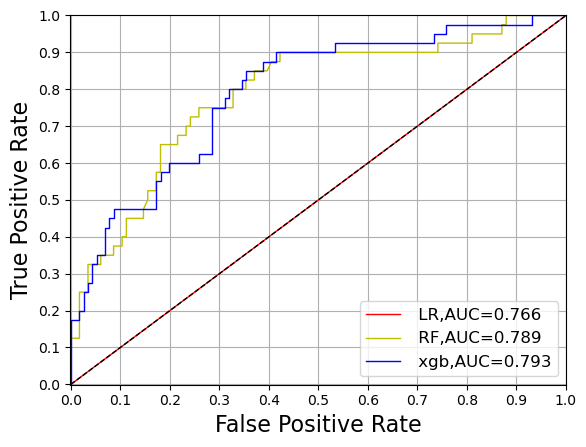

In [34]:
LR_fpr_test, LR_fpr_test, LR_thresholds_test = roc_curve(y_test, LR_y_preds_proba_test[:, 1])
BRF_fpr_test, BRF_tpr_test, BRF_thresholds_test = roc_curve(y_test, BRF_y_preds_proba_test[:, 1])
xgb_fpr_test, xgb_tpr_test, xgb_thresholds_test = roc_curve(y_test, xgb_y_preds_proba_test[:, 1]) 


plt.plot(LR_fpr_test, LR_fpr_test,c='r', lw=1, label=u' LR,AUC=%.3f'% LR_auc_test)
plt.plot(BRF_fpr_test, BRF_tpr_test,c='y', lw=1, label=u' RF,AUC=%.3f'% BRF_auc_test)
plt.plot(xgb_fpr_test, xgb_tpr_test,c='b', lw=1, label=u' xgb,AUC=%.3f'% xgbc_auc_test)
plt.plot ((0, 1), (0, 1), c='0', lw=1, ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize= 16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.grid (b=True, ls='-')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'', fontsize=18)